# Intro to Julia and Jupyter

Prowadzący: Łukasz Kraiński

Kontakt: lukasz.krainski123@gmail.com / lkrain@sgh.waw.pl

## 1.Quick Jupyter Notebook guide

Use **Arrow keys** to move up and down
***

Use **Enter** to activate cell and **ESC** to deactivate it
***

Use **CTRL+Enter** to execute cell (interpret Markdown or Python code)
***

While cell is deactivated (you are in Command mode) use **M** to turn cell into Markdown or **Y** to switch to Python
___

**a** adds cell above and **b** adds cell below (**ALT+Enter** execute and insert below)
___

Delete cell using **dd**
___

More shortcuts will pop up after pressing **H**

## 2.Markdown guide

[Markdown Cheatsheet](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet)

### Julia introduction

Based on: 
- Julia express http://bogumilkaminski.pl/files/julia_express.pdf
- Presentation by dr Szufel

## Key features of Julia

- **Performance** : Dynamically compiled to optimized native machine code

- **Scalability** : build in support for High Performance Computing  (SIMD, Threading, Distributed computing)

- **Modern design of the language** : multiple dispatch, metaprogramming (code genration), type system

- **MIT License** : corporate-use friendly (also package ecosystem)

- **Integration with other popular languages** : R and Python can be called from Julia

### Performance

In [1]:
function first_func(n::Int)
           A = rand(n, n)
           b = rand(n)
           return (A\b)'
end
@time first_func(40)

  0.015207 seconds (17 allocations: 46.078 KiB)


1×40 adjoint(::Vector{Float64}) with eltype Float64:
 -0.808815  0.204164  -0.346377  0.800005  …  0.964418  1.30393  0.144318

In [2]:
#Second function run - much faster!!
@time first_func(40)

  0.001033 seconds (5 allocations: 26.422 KiB)


1×40 adjoint(::Vector{Float64}) with eltype Float64:
 -0.992498  0.816733  0.918902  0.248287  …  1.67301  0.246263  1.68212

http://slides.com/valentinchuravy/julia-parallelism#/

<img src="https://i.imgur.com/ut1a7mT.png" alt="SIMD" width="600px">


In [3]:
#Getting machine code instructions
@code_native first_func(1)

	.text
; ┌ @ In[1]:1 within `first_func'
	pushq	%rbp
	movq	%rsp, %rbp
	pushq	%rsi
	pushq	%rdi
	pushq	%rbx
	andq	$-32, %rsp
	subq	$160, %rsp
	movq	%rcx, %rdi
	vxorps	%xmm0, %xmm0, %xmm0
	vmovaps	%ymm0, 64(%rsp)
	movl	$jl_get_ptls_states, %eax
	vzeroupper
	callq	*%rax
	movq	%rax, %rsi
; │ @ In[1]:2 within `first_func'
	movq	$8, 64(%rsp)
	movq	(%rsi), %rax
	movq	%rax, 72(%rsp)
	leaq	64(%rsp), %rax
	movq	%rax, (%rsi)
	movq	%rdi, 120(%rsp)
	movq	%rdi, 128(%rsp)
; │┌ @ Random.jl:277 within `rand'
	movabsq	$rand, %rax
	leaq	120(%rsp), %rcx
	callq	*%rax
	movq	%rax, %rbx
; │└
; │ @ In[1]:3 within `first_func'
	movq	%rdi, 56(%rsp)
	movq	%rbx, 88(%rsp)
; │┌ @ Random.jl:277 within `rand'
	movabsq	$rand, %rax
	leaq	56(%rsp), %rcx
	callq	*%rax
	movq	%rax, 80(%rsp)
; │└
; │ @ In[1]:4 within `first_func'
	movq	%rbx, 136(%rsp)
	movq	%rax, 144(%rsp)
	movabsq	$"\", %rax
	leaq	136(%rsp), %rdx
	movl	$281874256, %ecx                # imm = 0x10CD0F50
	movl	$2, %r8d
	callq	*%rax
	movq	72(%rsp), %rcx
	movq	%r

### Scalability

In [56]:
#] add BenchmarkTools

In [4]:
using BenchmarkTools;

Single instruction, multiple data (SIMD) is a class of parallel computing. It describes processors with multiple processing elements that perform the same operation on multiple data points simultaneously.
[Wiki](https://en.wikipedia.org/wiki/SIMD)

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/ce/SIMD2.svg/1200px-SIMD2.svg.png" alt="SIMD" width="200px">

In [5]:
#Scalability
function dot1(x, y)
    s = 0.0
    for i in 1:length(x)
        @inbounds s += x[i]*y[i]
    end
    s
end

#Just adding one macro @simd
function dot2(x, y)
    s = 0.0
    @simd for i in 1:length(x)
        @inbounds s += x[i]*y[i]
    end
    s
end

dot2 (generic function with 1 method)

In [6]:
@btime dot1(ones(10000),ones(10000))

  32.200 μs (4 allocations: 156.41 KiB)


10000.0

In [7]:
@btime dot2(ones(10000),ones(10000))

  25.300 μs (4 allocations: 156.41 KiB)


10000.0

### Modern design

In [61]:
##Multiple dispatch
f(x::Int64) = println("This must be some integer");
f(x::Float64) = println("This must be a float");

In [62]:
f(3)
f(3.14)

This must be some integer
This must be a float


In [63]:
##Unicode support
#\pi + TAB
println(π)
#\infty + TAB
println("∞")
#\:cat: + TAB
print("🐱")

π
∞
🐱

In [64]:
🍣 = 2; 🎅 = 4
🎅*🍣

8

In [65]:
#What was first egg or chicken?
'🍳'< '🐔'

true

In [66]:
log(exp(π^(1/π)))

1.4396194958475907

## Julia basics

Running julia invokes an interactive (REPL)mode. In thismode some useful commands are:

1. ^D (exits Julia);

2. ^C (interrupts computations);

3. ? (enters help mode);

4. ; (enters system shell mode);

5. ] (enters package managermode);

6. Ctrl-l clears screen;

7. putting ; after the expression will disable showing its value in REPL (not needed in scripts).

In [67]:
?println #no such function, but there are other similar

search: println printstyled print sprint @print isprint



```
println([io::IO], xs...)
```

Print (using [`print`](@ref)) `xs` followed by a newline. If `io` is not supplied, prints to [`stdout`](@ref).

# Examples

```jldoctest
julia> println("Hello, world")
Hello, world

julia> io = IOBuffer();

julia> println(io, "Hello, world")

julia> String(take!(io))
"Hello, world\n"
```


In [68]:
?length

search: length



```
length(collection) -> Integer
```

Return the number of elements in the collection.

Use [`lastindex`](@ref) to get the last valid index of an indexable collection.

# Examples

```jldoctest
julia> length(1:5)
5

julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(A::AbstractArray)
```

Return the number of elements in the array, defaults to `prod(size(A))`.

# Examples

```jldoctest
julia> length([1, 2, 3, 4])
4

julia> length([1 2; 3 4])
4
```

---

```
length(s::AbstractString) -> Int
length(s::AbstractString, i::Integer, j::Integer) -> Int
```

Return the number of characters in string `s` from indices `i` through `j`.

This is computed as the number of code unit indices from `i` to `j` which are valid character indices. With only a single string argument, this computes the number of characters in the entire string. With `i` and `j` arguments it computes the number of indices between `i` and `j` inclusive that are valid indices in the string `s`. In addition to in-bounds values, `i` may take the out-of-bounds value `ncodeunits(s) + 1` and `j` may take the out-of-bounds value `0`.

!!! note
    The time complexity of this operation is linear in general. That is, it will take the time proportional to the number of bytes or characters in the string because it counts the value on the fly. This is in contrast to the method for arrays, which is a constant-time operation.


See also: [`isvalid`](@ref), [`ncodeunits`](@ref), [`lastindex`](@ref), [`thisind`](@ref), [`nextind`](@ref), [`prevind`](@ref)

# Examples

```jldoctest
julia> length("jμΛIα")
5
```


**working in shell**

In [69]:
;cd

C:\Users\Vlad


**Working with package manager**

In [70]:
] status

      Status `C:\Users\Vlad\.julia\environments\v1.6\Project.toml`
  [46ada45e] Agents v4.1.4
  [aae01518] BandedMatrices v0.16.7
  [6e4b80f9] BenchmarkTools v0.5.0
  [336ed68f] CSV v0.8.4
  [9961bab8] Cbc v0.7.1
  [8f4d0f93] Conda v1.5.1
  [a93c6f00] DataFrames v0.21.8
  [864edb3b] DataStructures v0.18.9
  [31c24e10] Distributions v0.24.15
  [f6369f11] ForwardDiff v0.10.16
  [6e85b7ee] FredData v0.4.0
  [da1fdf0e] FreqTables v0.4.2
  [38e38edf] GLM v1.4.0
  [60bf3e95] GLPK v0.14.7
  [28b8d3ca] GR v0.55.0
  [a2cc645c] GraphPlot v0.4.4
  [7073ff75] IJulia v1.23.2
  [b6b21f68] Ipopt v0.6.5
  [4076af6c] JuMP v0.21.6
  [e5e0dc1b] Juno v0.8.4
  [093fc24a] LightGraphs v1.3.5
  [86cd37e6] OpenStreetMapX v0.2.3
  [429524aa] Optim v1.2.4
  [3b7a836e] PGFPlots v3.3.6
  [d96e819e] Parameters v0.12.2
  [91a5bcdd] Plots v1.10.6
  [438e738f] PyCall v1.92.2
  [d330b81b] PyPlot v2.9.0
  [3646fa90] ScikitLearn v0.6.3
  [aa4a32ff] SimpleHypergraphs v0.1.14
  [2913bbd2] StatsBase v0.33.3
  [fdbf4ff8] XLS

### Types

In [71]:
1::Int # 64 bit integer on 64 bit Julia
1.0::Float64 # 64 bit float, defines NaN, -Inf, Inf
true::Bool # boolean, allows "true" and "false"
'c'::Char # character, allows Unicode
"s"::AbstractString # strings, allows Unicode, consists of characters

"s"

In [72]:
Char('🍣') #sushi is also a character

'🍣': Unicode U+1F363 (category So: Symbol, other)

In [73]:
Char("🍣") #string can't be converted to character

LoadError: MethodError: no method matching Char(::String)
[0mClosest candidates are:
[0m  (::Type{T})([91m::T[39m) where T<:AbstractChar at char.jl:51
[0m  (::Type{T})([91m::AbstractChar[39m) where T<:Union{AbstractChar, Number} at char.jl:50
[0m  Char([91m::UInt32[39m) at char.jl:158
[0m  ...

In [74]:
Char("🍣"[1])

'🍣': Unicode U+1F363 (category So: Symbol, other)

In [75]:
println(Int('🍳'))
println(Int('🐔'))
println(Char(127859))

127859
128020
🍳


More on strings and characters in Julia:
https://docs.julialang.org/en/v1/manual/strings/

**More on conversion**

In [76]:
Int64('a') # character to integer

97

In [77]:
Int64(1.3) # inexact error

LoadError: InexactError: Int64(1.3)

In [78]:
println(string(true))
# string can take more than one argument and concatenate them
println(string(1,true))

true
1true


In [79]:
#General conversion can be done using convert(Type, x)
convert(Int64, 1.0)

1

In [80]:
subtypes(Real)

4-element Vector{Any}:
 AbstractFloat
 AbstractIrrational
 Integer
 Rational

**Numeric types in Julia**

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d9/Julia-number-type-hierarchy.svg" alt="Numeric types" width="1000px"> 

In [81]:
#Macro to print results nicely
macro print(func)
    println(func," : ",eval(func))
end

@print (macro with 1 method)

In [82]:
@print isa(1, Float64) # false, integer is not a float
@print isa(1.0, Float64) # true
@print 1.0 isa Number # an alternative syntax; true, Number is abstract type
@print supertype(Int64) # supertype of Int64
@print subtypes(Real) # subtypes of abstract type Real

1 isa Float64 : false
1.0 isa Float64 : true
1.0 isa Number : true
supertype(Int64) : Signed
subtypes(Real) : Any[AbstractFloat, AbstractIrrational, Integer, Rational]


In [83]:
@print 1 + 1im # a complex number
@print 123//456 # rational numbers are created using // operator

1 + 1im : 1 + 1im
123 // 456 : 41//152


**Special types**

In [84]:
@print Any # all objects are of this type
@print Union{} # subtype of all types, no object can have this type
@print Nothing # type indicating nothing (absence of a value), a subtype of Any
show(nothing) # only instance of Nothing
println()
@print Missing # type indicating missing value (a value exists but is unknown), a subtype of Any
@print missing # only instance of Missing

Any : Any
Union{} : Union{}
Nothing : Nothing
nothing
Missing : Missing
missing : missing


In [85]:
isa('🍍',Any)

true

In [86]:
isa.([4,3.14,"ala"],Union{Int,Float64}) #. (dot) is a broadcast operator explained later

3-element BitVector:
 1
 1
 0

**Tuples and named tuples**

In [87]:
print(()," ",typeof(())) # empty tuple

() Tuple{}

In [88]:
println((1,)) #one element tuple
println(("ZMS",3))
x = (1, 2, 3)
print(x[1])
x[1]=1 #immutable

(1,)
("ZMS", 3)
1

LoadError: MethodError: no method matching setindex!(::Tuple{Int64, Int64, Int64}, ::Int64, ::Int64)

In [89]:
#Unpacking (partial)
a,b=x
print("a is ",a," and b is ",b)

a is 1 and b is 2

In [90]:
#Named tuple
x2=(course="ZMS",average_grade=3)
println(x2)
print(x2.average_grade)

(course = "ZMS", average_grade = 3)
3

**Arrays**

In [91]:
#Array of Ints (undefined) - random numbers
Array{Int}(undef, 2, 3)

2×3 Matrix{Int64}:
 21474836483  51539607562  4294967313
 17179869190  47244640269       29650

In [92]:
@print zeros(5)
@print ones(5)
@print ones(Int64, 2, 2)

zeros(5) : [0.0, 0.0, 0.0, 0.0, 0.0]
ones(5) : [1.0, 1.0, 1.0, 1.0, 1.0]
ones(Int64, 2, 2) : [1 1; 1 1]


In [93]:
ones(Int64, 2, 2)

2×2 Matrix{Int64}:
 1  1
 1  1

In [94]:
@print 1:10
@print collect(1:10)

1:10 : 1:10
collect(1:10) : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [95]:
#Vectors (1-dim arrays)
# a vector with one element (not a scalar)
[1]

1-element Vector{Int64}:
 1

In [96]:
# a comprehension generating 2x3 array - similar to Python
[x * y for x in 1:2, y in 1:3]

2×3 Matrix{Int64}:
 1  2  3
 2  4  6

In [97]:
#This is 1x2 matrix
[1 2]

1×2 Matrix{Int64}:
 1  2

In [98]:
#This is 2-element vector
[1, 2] #[1;2]

2-element Vector{Int64}:
 1
 2

In [99]:
#Arrays utility functions
a = [x * y for x in 1:2, y in 1:4, z in 1:3];
@print ndims(a) # number of dimensions in a
@print eltype(a) # type of elements in a
@print length(a) # number of elements in a
@print size(a) # a tuple containing dimension sizes of a
@print vec(a) # cast an array to vector (single dimension)

ndims(a) : 3
eltype(a) : Int64
length(a) : 24
size(a) : (2, 4, 3)
vec(a) : [1, 2, 2, 4, 3, 6, 4, 8, 1, 2, 2, 4, 3, 6, 4, 8, 1, 2, 2, 4, 3, 6, 4, 8]


In [100]:
a = 0:0.01:1 # range with step 0.01
@print a[1] # get scalar 0.0
@print a[end] # get scalar 1.0 (last position)
@print a[1:2:end] # every second element from range - collect() to get vector
@print a[[1, 3, 6]] # 1st, 3rd and 6th element of a, Array{Float64,1}
@print lastindex(a) # last index of the collection a; similarly firstindex

a[1] : 0.0
a[end] : 1.0
a[1:2:end] : 0.0:0.02:1.0
a[[1, 3, 6]] : [0.0, 0.02, 0.05]
lastindex(a) : 101


In [101]:
#Passing by reference and copies
x = Array{Any}(undef, 2)
x[1] = ones(2)
x[2] = trues(3)
@print x
a = x
b = copy(x) # shallow copy
c = deepcopy(x) # deep copy
x[1] = "Big"
x[2][1] = false
@print a # identical as x
@print b # subobjects still changed (shallow copy)
@print c #totally separate object

x : Any[[1.0, 1.0], Bool[1, 1, 1]]
a : Any["Big", Bool[0, 1, 1]]
b : Any[[1.0, 1.0], Bool[0, 1, 1]]
c : Any[[1.0, 1.0], Bool[1, 1, 1]]


**Dictionaries**

In [102]:
x = Dict{Float64, Int64}() # an empty dictionary mapping floats to integers
y = Dict("a"=>1, "b"=>2) # a filled dictionary
@print y["a"] # element retrieval
y["c"] = 3 # added element
@print haskey(y, "b") # check if y contains key "b"
@print keys(y), values(y) # tuple of collections returning keys and values in y
delete!(y, "b") # delete a key from a collection, see also: pop!
@print get(y,"b","default") # return y["c"] or "default" if not haskey(y,"c")

y["a"] : 1
haskey(y, "b") : true
(keys(y), values(y)) : (["c", "b", "a"], [3, 2, 1])
get(y, "b", "default") : default


**String operations**

In [103]:
@print "Hi " * "there!" # string concatenation
@print "Ho " ^ 3 # repeat string
@print string("a = ", 123.3) # create using print function
@print occursin("CD", "ABCD") # check if first string contains second
println("\"\n\t\$") # C-like escaping in strings, new \$ escape
x = 123
println("$x + 3 = $(x+3)") # unescaped $ is used for interpolation
println("\$199") # to get a $ symbol you must escape it
println(raw"D:\path") # a raw string literal; useful for paths under Windows

"Hi " * "there!" : Hi there!
"Ho " ^ 3 : Ho Ho Ho 
string("a = ", 123.3) : a = 123.3
occursin("CD", "ABCD") : true
"
	$
123 + 3 = 126
$199
D:\path


**Programming Constructs**

In [104]:
#Compund expressions
x = (a = 1; 2 * a) # after: x = 2; a = 1
y = begin
    b = 3
    3 * b
end # after: y = 9; b = 3
@print x
@print a
@print y
@print b

x : 2
a : 1
y : 9
b : 3


In [105]:
if false # if clause requires Bool test
    z = 1
elseif 1 == 2
    z = 2
else
    a = 3
end # after this a = 3 and z is undefined
@print a
@print z

a : 3


LoadError: LoadError: UndefVarError: z not defined
in expression starting at In[105]:9

In [106]:
1==2 ? "A" : "B" # standard ternary operator
#condition ? if_true : if_false

"B"

In [107]:
#for loop
for x in 1:10 # x in collection, can also use = here instead of in
    if 1 < x < 10
        continue # skip one iteration
    end
    println(x)
end

1
10


In [108]:
function f1(x, y=10) # f(x, y = 10) = x + y
    x + y 
end
@print f1(3,2)
@print f1(3)

f1(3, 2) : 5
f1(3) : 13


In [109]:
(x -> x^2)(3) # an anonymous function with a call example (lambda in Python)

9

In [110]:
#Multiple methods/ multiple disptach
methods(f)

# 2 methods for generic function "f":
[1] f(x::Int64) in Main at In[61]:2
[2] f(x::Float64) in Main at In[61]:3

**Broadcast operator**

In [111]:
@print true || false # binary or operator (singletons only), || and && use short-circut evaluation
@print 1 < 2 < 3 # chaining conditions is OK (singletons only without .)
@print [1 2] .< [2 1] # for vectorized operators need to add '.' in front

true || false : true
1 < 2 < 3 : true
[1 2] .< [2 1] : Bool[1 0]


In [112]:
x = [1 2 3]
# multiplication can be omitted between a literal and a variable or a left parenthesis
@print 2x + 2(x .+ 1)
y = [1, 2, 3]
@print x .+ y # a 3x3 matrix, dimension broadcasting
@print x + y' # a 1x3 matrix
@print x * y # array multiplication, a 1-element vector (not scalar)
@print x .* y # element-wise multiplication, a 3x3 array

2x + 2 * (x .+ 1) : [6 10 14]
x .+ y : [2 3 4; 3 4 5; 4 5 6]
x + y' : [2 4 6]
x * y : [14]
x .* y : [1 2 3; 2 4 6; 3 6 9]


In [113]:
x .+ y

3×3 Matrix{Int64}:
 2  3  4
 3  4  5
 4  5  6

In [114]:
@print x == [1 2 3] # true, object looks the same, by value
@print x === [1 2 3] # false, objects not identical, by reference

x == [1 2 3] : true
x === [1 2 3] : false


In [115]:
pointer(x)

Ptr{Int64} @0x000000001b2a4910

In [116]:
pointer([1 2 3])

Ptr{Int64} @0x000000004d6c3ee0

**Random numbers**

In [117]:
using Random

In [118]:
Random.seed!(1) # set random number generator seed to 1; needs calling first: using Random
@print rand() # generate random number from U[0,1)
@print rand(2, 3) # generate 2x3 matrix of random numbers from U[0,1]
@print rand(2:5, 10) # generate vector of 10 random integer numbers in range form 2 to 5
@print randn(10) # generate vector of 10 random numbers from standard normal distribution

rand() : 0.23603334566204692
rand(2, 3) : [0.34651701419196046 0.00790928339056074 0.21096820215853596; 0.3127069683360675 0.4886128300795012 0.951916339835734]
rand(2:5, 10) : [4, 3, 5, 5, 5, 5, 3, 5, 5, 2]
randn(10) : [-2.2670863488005306, 0.5299655761667461, 0.43142152642291204, 0.5837082875687786, 0.9632716050381906, 0.45879095505371686, -0.5223367574215084, 0.40839583832475224, -0.050451229933665284, -0.6936536438038856]


**Statistics and machine learning**

Visit http://juliastats.github.io/ for the details (in particular R-like data frames).

**Tabular data**

In [119]:
;curl -o iris.csv "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3716  100  3716    0     0   3716      0  0:00:01 --:--:--  0:00:01  6255


In [120]:
using DataFrames;
using CSV;

df = DataFrame(CSV.File("./iris.csv"));
first(df, 5) # print first 5 rows of a data frame; use the last function for last rows

,sepal_length,sepal_width,petal_length,petal_width,species
,Float64,Float64,Float64,Float64,String
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


**Plotting**

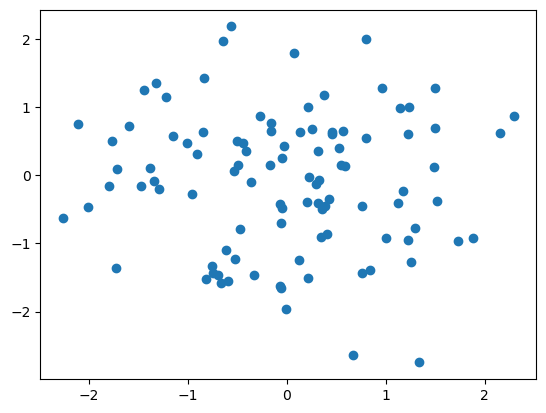

In [123]:
using PyPlot
using Random
Random.seed!(1) # make the plot reproducible
x, y = randn(100), randn(100)
scatter(x, y);

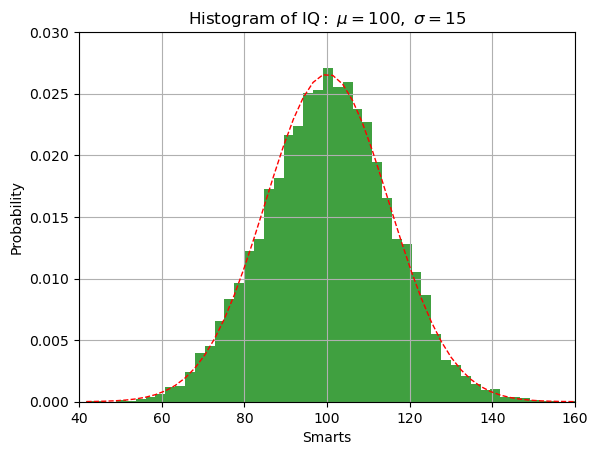

In [124]:
using Distributions
using PyPlot
mu, sigma = 100, 15
x = mu .+ sigma * randn(10000)
n, bins, patches = plt.hist(x, 50, density=1,
    facecolor="green", alpha=0.75)

y = pdf.(Ref(Normal(mu, sigma)), bins);
plot(bins, y, "r--", linewidth=1)

xlabel("Smarts")
ylabel("Probability")
title(raw"$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$")
axis([40, 160,0, 0.03])
grid(true)